In [ ]:
pip install psycopg2

In [ ]:
pip install sqlalchemy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:


import pandas as pd

from sqlalchemy import create_engine, text

# PostgreSQL connection details
USER = "postgres"
PASSWORD = 7849
HOST = "localhost"
PORT = "5432"
DBNAME = "shopify_db"   # You must create this database in PostgreSQL first

# Create connection engine
engine = create_engine(f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

print("✅ Connected to PostgreSQL Database!")


In [ ]:
# Bar Chart: Revenue by Category
df_categories.plot(kind="bar", x="category", y="revenue", legend=False, title="Revenue by Category")
plt.ylabel("Revenue")
plt.show()

# Line Chart: Monthly Revenue
df_monthly.plot(kind="line", x="month", y="monthly_revenue", marker="o", title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# Pie Chart: Top Customers
df_customers.set_index("name").plot(kind="pie", y="total_spend", autopct="%.2f%%", title="Top Customers Spend")
plt.ylabel("")
plt.show()


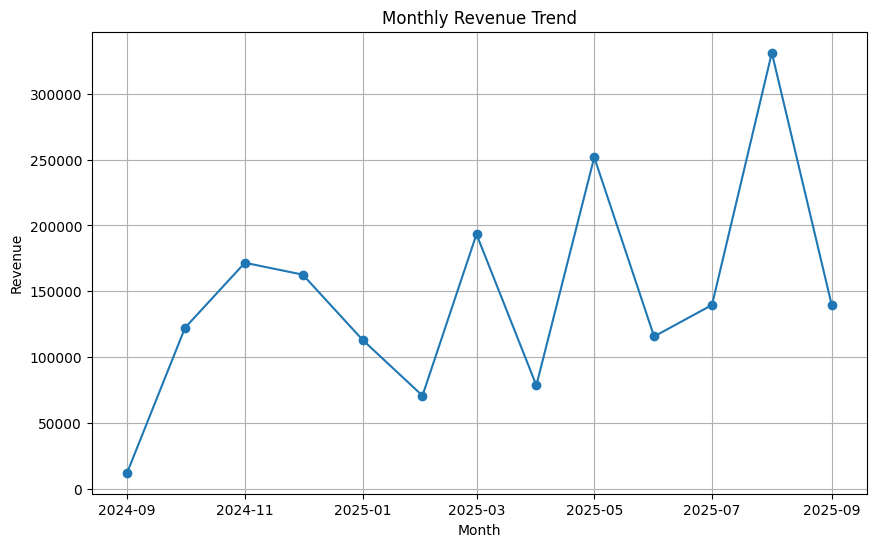

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT DATE_TRUNC('month', payment_date) AS month, SUM(amount) AS revenue
FROM payments
GROUP BY month
ORDER BY month;
"""

df_revenue = pd.read_sql(query, engine)

plt.figure(figsize=(10,6))
plt.plot(df_revenue["month"], df_revenue["revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


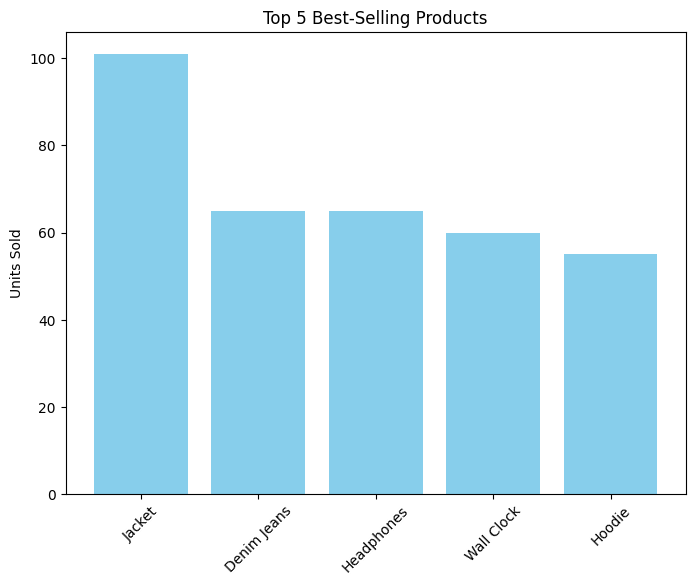

In [15]:
query = """
SELECT p.name, SUM(oi.quantity) AS total_sold
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.name
ORDER BY total_sold DESC
LIMIT 5;
"""

df_products = pd.read_sql(query, engine)

plt.figure(figsize=(8,6))
plt.bar(df_products["name"], df_products["total_sold"], color="skyblue")
plt.title("Top 5 Best-Selling Products")
plt.xticks(rotation=45)
plt.ylabel("Units Sold")
plt.show()



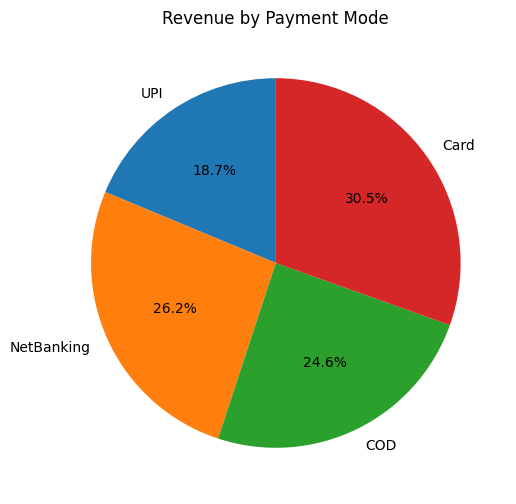

In [16]:
query = """
SELECT payment_mode, SUM(amount) AS total_revenue
FROM payments
GROUP BY payment_mode;
"""

df_modes = pd.read_sql(query, engine)

plt.figure(figsize=(6,6))
plt.pie(df_modes["total_revenue"], labels=df_modes["payment_mode"], autopct="%1.1f%%", startangle=90)
plt.title("Revenue by Payment Mode")
plt.show()
